Use (regularized) Newton’s method to minimize $g(w) = cos(w)$ beginning at w = 0.1. In particular make sure you achieve decrease at *every* step of Newton’s method.

In [5]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad
from autograd import numpy as np
from autograd import value_and_grad
from autograd import hessian
def newtons_method(g, max_its, w, **kwargs):
    gradient = grad(g)
    #eigenvals of a square matrix -- C in our example
    hess = hessian(g)
    
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']
        
    weight_history = [w]
    cost_history = [g(w)]
    
    for k in range(max_its):
        grad_eval = gradient(w)
        hess_eval = hess(w)
        
        print("hess_eval: ", hess_eval)
        print("np.size-hess_eval = 1 raised to the .5: ", np.size(hess_eval)**(.5))
        hess_eval.shape = (int((np.size(hess_eval))**(.5)), int((np.size(hess_eval))**(.5)))
        print("new hess eval: ", hess_eval)
        #i would like to understand this reshape betteer
        #we're assuming it's positive aka convex
        
        print("A will be: ", hess_eval + epsilon*np.eye(w.size))
        A = hess_eval + epsilon*np.eye(w.size) #already regularized then? 
#         A = hess_eval + (epsilon*np.eye(w.size)/2)*np.linalg.norm(#something here?) 
        b = grad_eval
        
        #I don't follow how the below gets us to our next point
        w = np.linalg.solve(A,np.dot(A,w) - b) #eqt4.16 in book?
        
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

hess_eval:  [[[-0.99500417]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-0.99500417]]
A will be:  [[-0.99500407]]
hess_eval:  [[[-0.99999994]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-0.99999994]]
A will be:  [[-0.99999984]]
hess_eval:  [[[-1.]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-1.]]
A will be:  [[-0.9999999]]
hess_eval:  [[[-1.]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-1.]]
A will be:  [[-0.9999999]]
hess_eval:  [[[-1.]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-1.]]
A will be:  [[-0.9999999]]
hess_eval:  [[[-1.]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-1.]]
A will be:  [[-0.9999999]]
hess_eval:  [[[-1.]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-1.]]
A will be:  [[-0.9999999]]
hess_eval:  [[[-1.]]]
np.size-hess_eval = 1 raised to the .5:  1.0
new hess eval:  [[-1.]]
A will be:  [[-0.9999999]]
hess_eval:  [[[-1.]]]


<IPython.core.display.Javascript object>


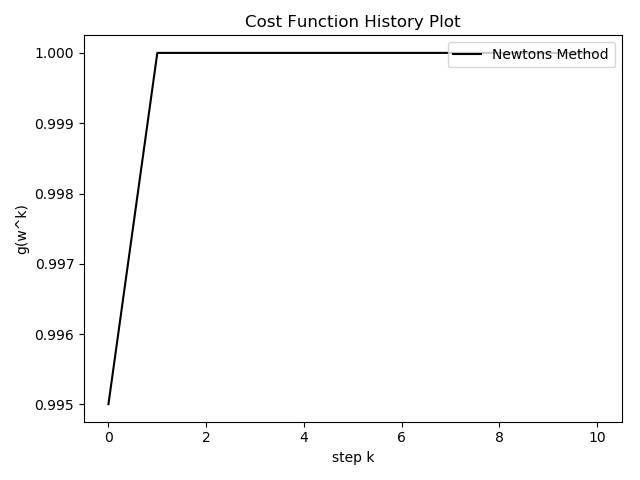

In [6]:
# init_point = 2.5
init_point = np.array([0.1])
g = lambda w: np.cos(w)
#based on 3.6 of previous hw i feel like this should minimize at -.2
iterations = 10

a1_wh, a1_ch = newtons_method(g, iterations, init_point)
# a2_wh, a2_ch = norm_gradient_descent(g, iterations, init_point, 'full')
# a3_wh, a3_ch = norm_gradient_descent(g, iterations, init_point, 'component')



plt.plot(a1_ch, 'k-', label = 'Newtons Method')
# plt.plot(a2_ch, 'm-', label = 'Fully Normalized grad descent')
# plt.plot(a3_ch, 'b-', label = 'Component Normalized grad descent')
plt.title("Cost Function History Plot")
plt.legend(loc="upper right")
plt.xlabel("step k")
plt.ylabel("g(w^k)")
plt.show()